In [ ]:
#imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel_h, sobel_v, sobel
from skimage.filters import prewitt_h, prewitt_v, prewitt
from skimage import exposure
from skimage.feature import canny
from skimage.filters import laplace

# **Filtros lineales de detección de contornos**

## **Operador de Sobel**

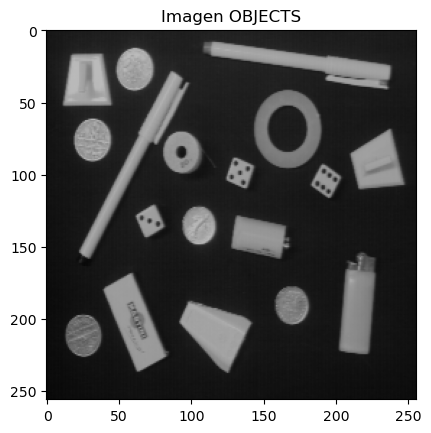

In [15]:
#Carga de imagen 
objects = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)
#Visualizar la imagen
plt.imshow(objects, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen OBJECTS')
plt.show()

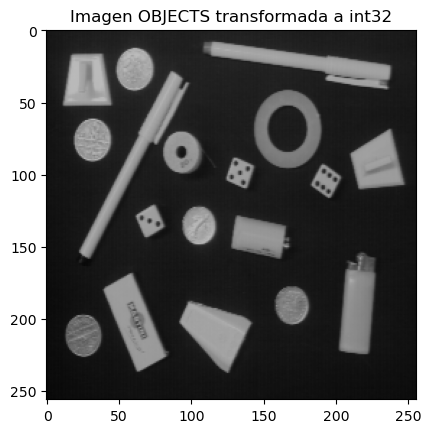

In [16]:
#transformacion a int32
objects_int32 = objects.astype(np.int32)
#visualizar la imagen transformada
plt.imshow(objects_int32, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen OBJECTS transformada a int32')
plt.show()

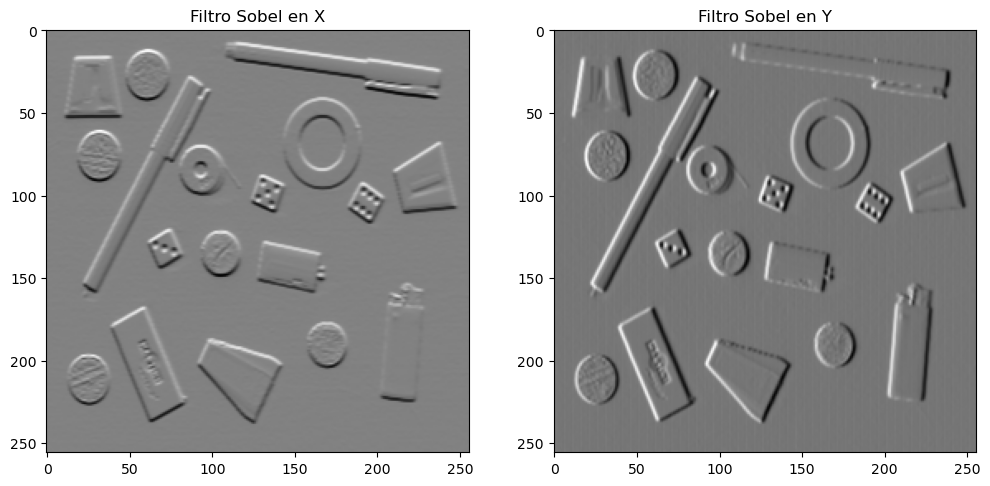

In [17]:
#Aplicacion de filtro sobel en x
img_sh = sobel_h(objects_int32)
#Aplicacion de filtro sobel en y
img_sv = sobel_v(objects_int32)
#Visualizar la imagen filtrada
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_sh, cmap='gray')
ax[0].set_title('Filtro Sobel en X')
ax[1].imshow(img_sv, cmap='gray')
ax[1].set_title('Filtro Sobel en Y')
plt.show()

**Descripción de sobel en x**

Al realizar el filtro sobel aplicado al eje x, el cual tiene como matriz asociada:

$$ g_{x} = \begin{bmatrix} -1 & -2 & -1 \\\\ 0 & 0 & 0 \\\\ 1 & 2 & 1 \end{bmatrix} $$

La imagen resultante se observa mayormente en un tono gris claro uniforme, lo que indica poca variación de intensidad en la dirección evaluada, sin embargo, los bordes horizontales de los objetos se resaltan al presentar transiciones bruscas entre el fondo y las figuras, generando valores altos de gradiente que permiten identificar con mayor claridad sus contornos.

**Descripción de sobel en y**

Al realizar el filtro sobel aplicado al eje y, el cual tiene como matriz asociada:

$$ g_{y} = \begin{bmatrix} -1 & 0 & 1 \\\\ -2 & 0 & 2 \\\\ -1 & 0 & 1 \end{bmatrix} $$

De igual forma que con el Sobel horizontal, el fondo se mantiene en tonos grises relativamente uniformes debido a la baja variación de intensidad en esa dirección; sin embargo, en este caso se resaltan principalmente los bordes verticales de los objetos, ya que el operador detecta cambios de intensidad de izquierda a derecha, generando valores altos de gradiente en los contornos laterales y permitiendo identificar con mayor claridad sus límites verticales.

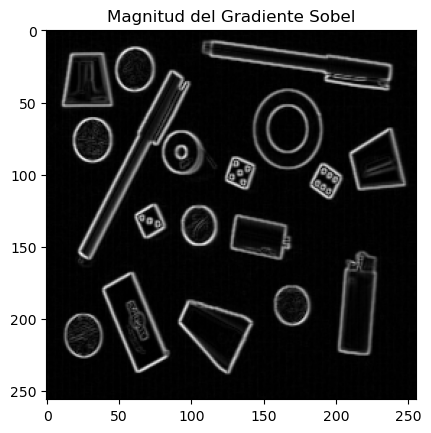

In [18]:
#Calculo de la magnitud del gradiente
objects_gradiente_sobel = np.absolute(img_sh) + np.absolute(img_sv)
#Visualizar la magnitud del gradiente
plt.imshow(objects_gradiente_sobel, cmap='gray')
plt.title('Magnitud del Gradiente Sobel')
plt.show()

**Descripción Magnitud del gradiente**

La magnitud del gradiente esta dada la formula:

$$ || \nabla f || \approx |g_{x}| + |g_{y}| $$

Al hacer la suma de los valores absolutos de las anteriores aplicaciones se observa que el fondo queda prácticamente negro, ya que en esas regiones no existen variaciones significativas de intensidad y, por lo tanto, la magnitud del gradiente es cercana a cero. En contraste, los contornos de los objetos aparecen claramente resaltados en tonos blancos, debido a que la combinación de ambas componentes del gradiente permite detectar cambios de intensidad en cualquier dirección, obteniendo así una representación completa y más precisa de los bordes presentes en la imagen.

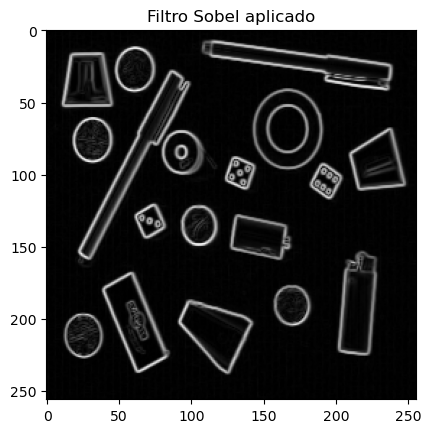

In [19]:
sobelAplicado = sobel(objects_int32)
#Visualizar la imagen filtrada con sobel
plt.imshow(sobelAplicado, cmap='gray')
plt.title('Filtro Sobel aplicado')
plt.show()

**Filtro Aplicado Por Libreria vs Filtro Suma Valores Absolutos**

En ambas imagenes se logra observar los bordes de los diferentes objetos de forma exitosa. Pese a que el filtro aplicado se puede llegar a observar un poco mejor en la definicion de bordes internos de los objetos nuestra aproximación es lo suficientemente buena para que esta mejorqa por parte del algoritmo de la libreria sea minima.

## **Operador de Prewitt**

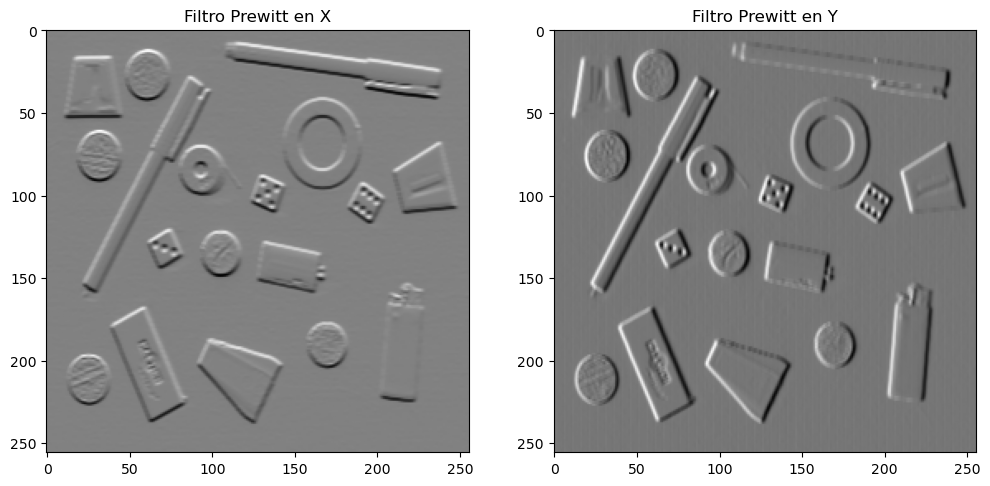

In [20]:
#Aplicacion de filtro prewitt en x
img_sh = prewitt_h(objects_int32)
#Aplicacion de filtro prewitt en y
img_sv = prewitt_v(objects_int32)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_sh, cmap='gray')
ax[0].set_title('Filtro Prewitt en X')
ax[1].imshow(img_sv, cmap='gray')
ax[1].set_title('Filtro Prewitt en Y')
plt.show()



**Descripción de prewitt en x**

Al aplicar el filtro de Prewitt en la dirección X, cuya máscara es:

$$ g_{x} = \begin{bmatrix} -1 & -1 & -1 \\\\ 0 & 0 & 0 \\\\ 1 & 1 & 1 \end{bmatrix} $$

La imagen resultante resalta principalmente los bordes horizontales, ya que detecta cambios de intensidad en la dirección vertical. El fondo se mantiene en tonos grises relativamente uniformes, mientras que los contornos aparecen más claros u oscuros debido a los valores altos del gradiente. A diferencia de Sobel, no utiliza el valor 2 en la máscara, por lo que el suavizado es menor.

**Descripción de prewitt en y**

Al aplicar el filtro de Prewitt en la dirección Y, cuya máscara es:

$$ g_{y} = \begin{bmatrix} -1 & 0 & 1 \\\\ -1 & 0 & 1 \\\\ -1 & 0 & 1 \end{bmatrix} $$

Esta imagen resalta principalmente los bordes verticales, ya que detecta cambios de intensidad de izquierda a derecha. Los contornos laterales de los objetos se observan bien definidos, mientras que el fondo permanece casi uniforme. Al no ponderar con 2 como Sobel, el filtro realiza un menor suavizado.

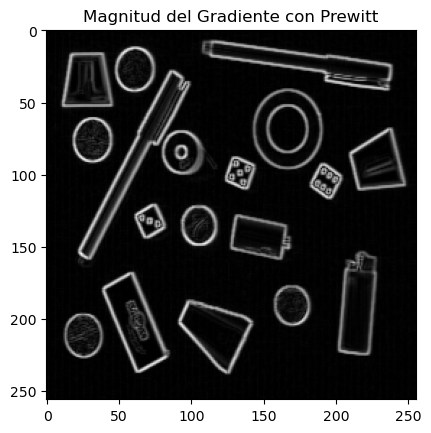

In [21]:
objects_gradiente_prewitt = np.absolute(img_sh) + np.absolute(img_sv)
plt.imshow(objects_gradiente_prewitt, cmap='gray')
plt.title('Magnitud del Gradiente con Prewitt')
plt.show()

**Descripción de la magnitud del gradiente**

La magnitud del gradiente se calcula como:

$$ || \nabla f || \approx |g_{x}| + |g_{y}| $$

Esta imagen combina la información de ambas direcciones, por lo que se resaltan todos los bordes, sin importar su orientación. El fondo aparece oscuro (baja variación), mientras que los contornos de los objetos se ven claramente iluminados, mostrando de forma más completa los límites de las figuras.

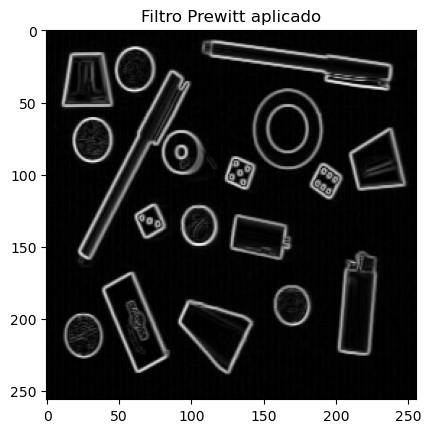

In [22]:
#Calcula bordes usando el filtro de sobel
img_s = prewitt(objects_int32)
#Visualizar la imagen filtrada con prewitt
plt.imshow(img_s, cmap='gray')
plt.title('Filtro Prewitt aplicado')
plt.show()

**Filtro Aplicado Por Libreria vs Filtro Suma Valores Absolutos**

En ambas imágenes se detectan correctamente los bordes de los objetos. La obtenida con la función de la librería muestra contornos ligeramente más uniformes y mejor balanceados en intensidad, mientras que la aproximación mediante la suma de valores absolutos produce resultados muy similares, aunque con bordes levemente más intensos o gruesos. En términos cualitativos, la diferencia es mínima y la aproximación resulta suficientemente buena.

## **Diferencia entre Sobel y Prewitt:**

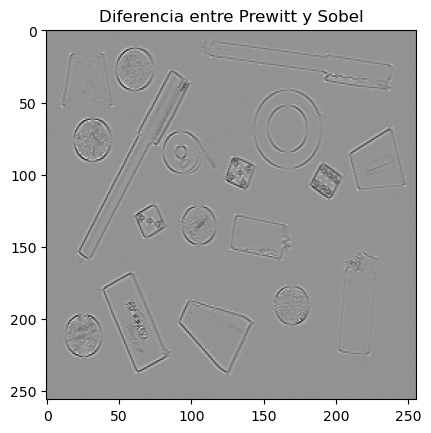

In [25]:
subtraction = cv2.subtract(objects_gradiente_prewitt, objects_gradiente_sobel)

plt.imshow(subtraction, cmap='gray')
plt.title('Diferencia entre Prewitt y Sobel')
plt.show()

**¿Qué diferencia visual hay entre el operador de Sobel y el de Prewitt?**

En la imagen de la resta entre Prewitt y Sobel se observan diferencias leves concentradas principalmente en los contornos de los objetos. Las variaciones aparecen como bordes residuales muy suaves, lo que indica que ambos operadores producen resultados muy similares. Sin embargo, Sobel tiende a generar bordes ligeramente más definidos y con mejor suavizado, debido a que su máscara asigna mayor peso a los píxeles centrales. Prewitt, al usar ponderaciones uniformes, resulta un poco más sensible al ruido y puede producir contornos ligeramente menos refinados. Visualmente, la diferencia es mínima, pero Sobel presenta una respuesta algo más robusta y estable en la detección de bordes.

In [26]:
# Frontera horizontal entre negro y blanco
matriz_1  = np.array([[0,0,0],
                      [0,0,0],
                      [255,255,255]])

# Frontera vertical entre negro y blanco
matriz_2 = np.array([[0,0,255],
                     [0,0,255],
                     [0,0,255]])

# Frontera oblicua entre negro y blanco
matriz_3 = np.array([[0,0,255],
                     [0,255,255],
                     [255,255,255]])

#Cuando la máscara se aleja de la frontera oblicua (máscara centrada en [0])
matriz_4 = np.array([[0,0,0],
                     [0,0,0],
                     [0,0,255]])

# Sobel
sobel_y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_x = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Prewitt
prewitt_y = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_x = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])

def aplicarFiltros(matriz, filtro_x, filtro_y):
    x = np.sum(matriz * filtro_x)
    y = np.sum(matriz * filtro_y)
    gradiente = np.abs(x) + np.abs(y)
    return x, y, gradiente

matrices = [matriz_1, matriz_2, matriz_3, matriz_4]
nombres = ['Frontera Horizontal', 'Frontera Vertical', 'Frontera Oblicua', 'Máscara Alejada']

for i, matriz in enumerate(matrices):
    print(f"Resultados para {nombres[i]}:")
    sobel_x_val, sobel_y_val, sobel_gradiente = aplicarFiltros(matriz, sobel_x, sobel_y)
    prewitt_x_val, prewitt_y_val, prewitt_gradiente = aplicarFiltros(matriz, prewitt_x, prewitt_y)
    
    print(f"  Sobel - Gradiente X: {sobel_x_val}, Gradiente Y: {sobel_y_val}, Magnitud: {sobel_gradiente}")
    print(f"  Prewitt - Gradiente X: {prewitt_x_val}, Gradiente Y: {prewitt_y_val}, Magnitud: {prewitt_gradiente}\n")
        
    

Resultados para Frontera Horizontal:
  Sobel - Gradiente X: 1020, Gradiente Y: 0, Magnitud: 1020
  Prewitt - Gradiente X: 765, Gradiente Y: 0, Magnitud: 765

Resultados para Frontera Vertical:
  Sobel - Gradiente X: 0, Gradiente Y: 1020, Magnitud: 1020
  Prewitt - Gradiente X: 0, Gradiente Y: 765, Magnitud: 765

Resultados para Frontera Oblicua:
  Sobel - Gradiente X: 765, Gradiente Y: 765, Magnitud: 1530
  Prewitt - Gradiente X: 510, Gradiente Y: 510, Magnitud: 1020

Resultados para Máscara Alejada:
  Sobel - Gradiente X: 255, Gradiente Y: 255, Magnitud: 510
  Prewitt - Gradiente X: 255, Gradiente Y: 255, Magnitud: 510



En las fronteras horizontal y vertical se observa que únicamente el gradiente perpendicular al borde toma valores distintos de cero, como es esperado teóricamente. En ambos casos, el operador de Sobel produce una magnitud mayor (1020) que Prewitt (765). Esta diferencia se debe a que Sobel asigna mayor peso a los píxeles centrales de la máscara, amplificando la respuesta ante cambios abruptos de intensidad.

En la frontera oblicua, ambos gradientes resultan distintos de cero porque la transición ocurre en ambas direcciones. Nuevamente, Sobel genera valores superiores (765 en cada dirección) frente a Prewitt (510), lo que confirma su mayor sensibilidad numérica ante el mismo patrón de borde.

Cuando la máscara se aleja del borde, la respuesta disminuye considerablemente, aunque no es nula debido a que aún existe un píxel con intensidad diferente dentro de la ventana. En términos generales, Sobel presenta una mayor magnitud de respuesta que Prewitt debido a su ponderación central, lo que lo hace más robusto en la detección de bordes.

# **Operador de Canny**

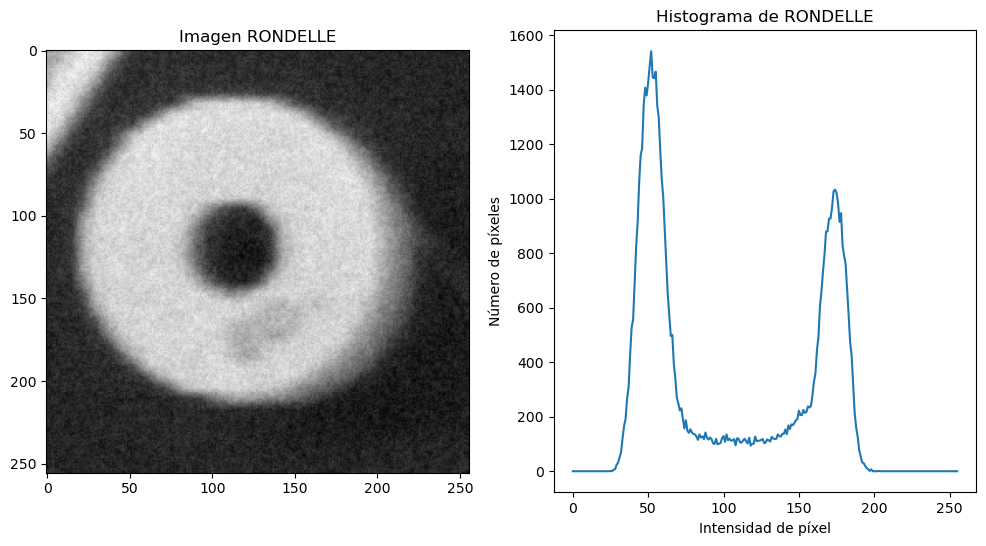

In [30]:
rondelle = cv2.imread('images/RONDELLE.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([rondelle], [0], None, [256], [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rondelle, cmap='gray')
ax[0].set_title('Imagen RONDELLE')
ax[1].plot(hist)
ax[1].set_title('Histograma de RONDELLE')
ax[1].set_xlabel('Intensidad de píxel')
ax[1].set_ylabel('Número de píxeles')
plt.show()

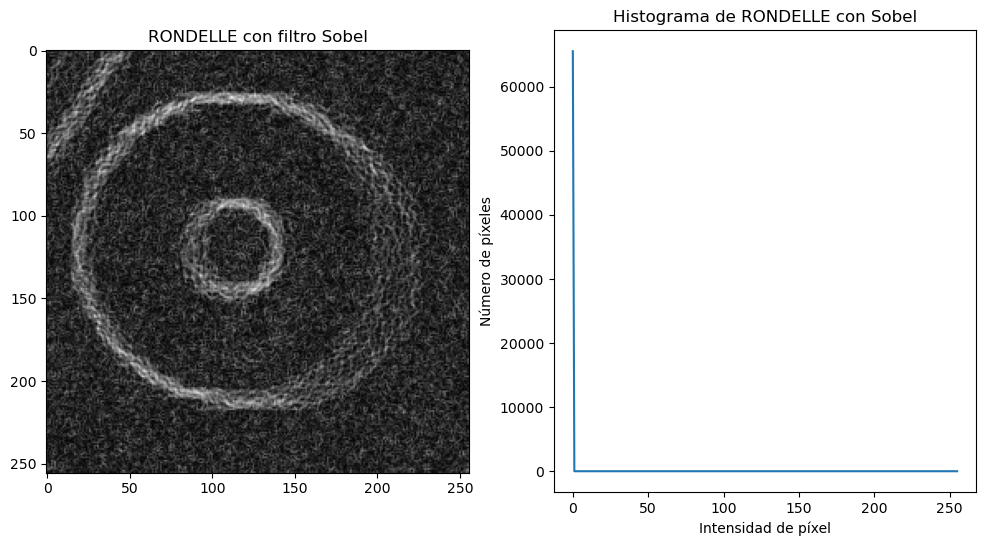

In [31]:
#Aplica el filtro Sobel horizontal
img_sh = sobel_h(rondelle)
#Aplica el filtro Sobel vertical
img_sv = sobel_v(rondelle)
#Sobel total
rondelle_sobel = np.abs(img_sh) + np.abs(img_sv)

#Histograma
hist_sobel = cv2.calcHist([rondelle_sobel.astype(np.uint8)], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rondelle_sobel, cmap='gray')
ax[0].set_title('RONDELLE con filtro Sobel')
ax[1].plot(hist_sobel)
ax[1].set_title('Histograma de RONDELLE con Sobel')
ax[1].set_xlabel('Intensidad de píxel')
ax[1].set_ylabel('Número de píxeles')
plt.show()

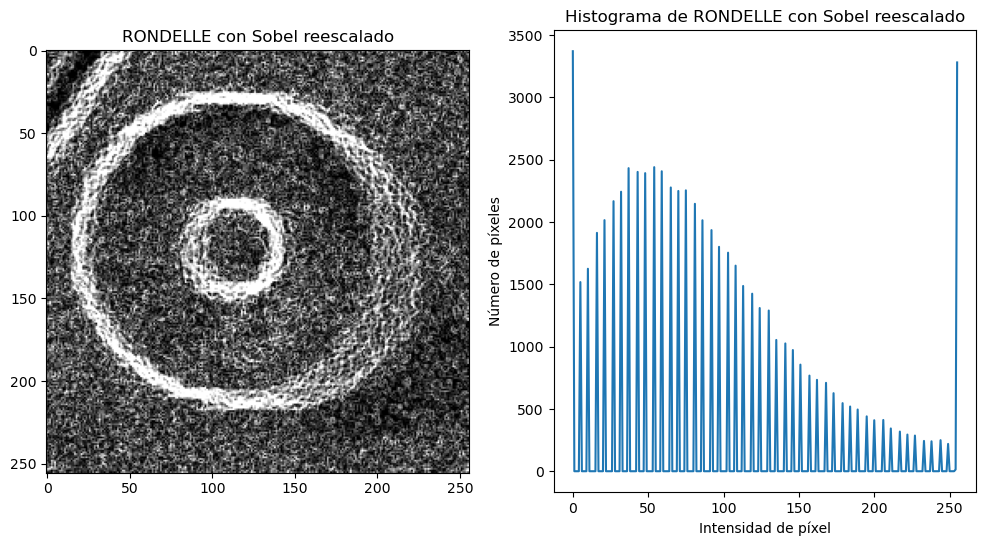

In [44]:
p5, p95 = np.percentile(rondelle_sobel, (5, 95)) # Buscamos los límites del histograma de bordes
# Reescalamos la imagen para mejorar el contraste de los bordes
rescaled_img = exposure.rescale_intensity(rondelle_sobel, in_range=(p5, p95), out_range=(0, 255))
# Histograma
hist_rescaled = cv2.calcHist([rescaled_img.astype(np.uint8)], [0], None, [256], [0, 256])
# Vusualizar
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rescaled_img, cmap='gray')
ax[0].set_title('RONDELLE con Sobel reescalado')
ax[1].plot(hist_rescaled)
ax[1].set_title('Histograma de RONDELLE con Sobel reescalado')
ax[1].set_xlabel('Intensidad de píxel')
ax[1].set_ylabel('Número de píxeles')
plt.show()

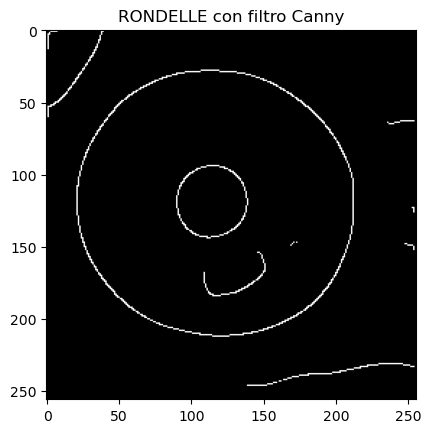

In [49]:
rondelle_candy = canny(rondelle, sigma=10, low_threshold=0, high_threshold=1)
plt.imshow(rondelle_candy, cmap='gray')
plt.title('RONDELLE con filtro Canny')
plt.show()


En comparación con el resultado obtenido con Sobel, el detector de Canny ofrece una detección de bordes más limpia y precisa. Mientras que Sobel resalta no solo los contornos principales del anillo sino también una gran cantidad de variaciones de intensidad en el fondo, generando una imagen con bastante ruido y bordes gruesos, Canny produce contornos más delgados, continuos y mejor definidos. Esto se debe a que Canny incorpora suavizado gaussiano, supresión no máxima y umbralización por histéresis, lo que permite conservar los bordes relevantes y descartar respuestas espurias que Sobel no filtra.

En cuanto a la imagen se puede observar que define de forma correcta los bordes de la mayoria de bjetos presentes en la imagen original, como la "dona" interior y la linea encontrada en la parte superior izquierda.

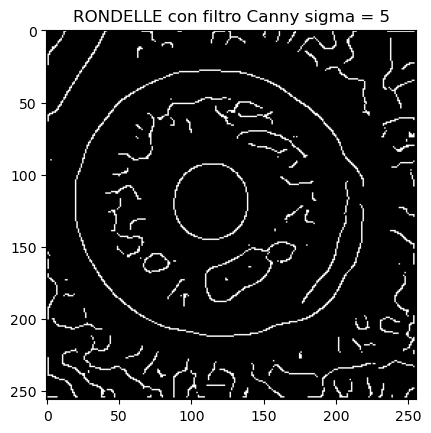

In [52]:
rondelle_candy2 = canny(rondelle, sigma=5, low_threshold=0, high_threshold=1)
plt.imshow(rondelle_candy2, cmap='gray')
plt.title('RONDELLE con filtro Canny sigma = 5')
plt.show()


Al disminuir el valor de sigma a 5 en el detector de Canny, se reduce el nivel de suavizado gaussiano previo al cálculo del gradiente. Esto implica que la imagen conserva más variaciones locales de intensidad, incluyendo pequeñas fluctuaciones y textura del fondo. Como consecuencia, el algoritmo detecta un mayor número de irregularidades que no corresponden a las estructuras principales, lo que incrementa visualmente el ruido en la imagen.

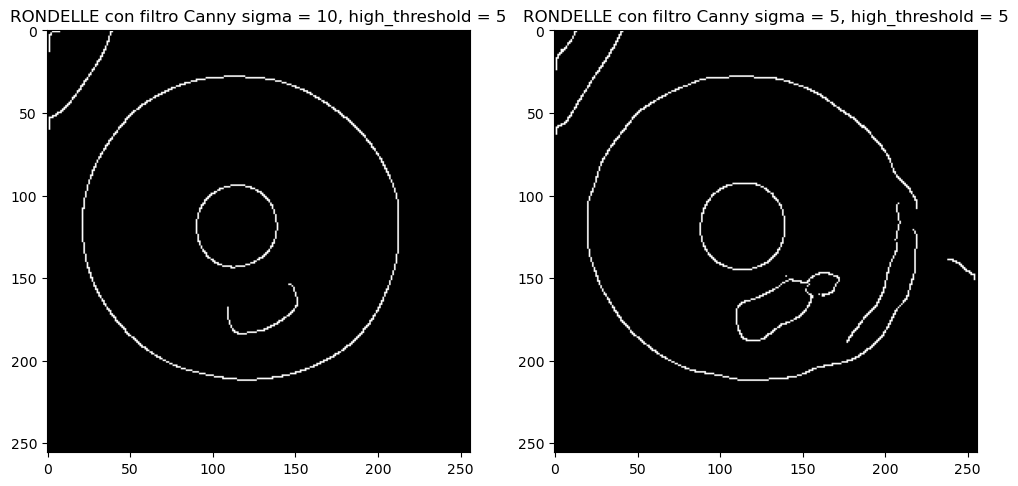

In [53]:
rondelle_candy3 = canny(rondelle, sigma=10, low_threshold=0, high_threshold=5)
rondelle_candy4 = canny(rondelle, sigma=5, low_threshold=0, high_threshold=5)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rondelle_candy3, cmap='gray')
ax[0].set_title('RONDELLE con filtro Canny sigma = 10, high_threshold = 5')
ax[1].imshow(rondelle_candy4, cmap='gray')
ax[1].set_title('RONDELLE con filtro Canny sigma = 5, high_threshold = 5')
plt.show()


**Comparación de la variación de parámetros en el operador Canny**

Al aumentar el umbral superior a 5, se endurece el criterio para clasificar un píxel como borde fuerte dentro del proceso de histéresis. Esto reduce la propagación de bordes débiles asociados a ruido o textura superficial, mejorando la selectividad del detector.

**Caso σ = 10 con high_threshold = 5**

La imagen presenta contornos muy definidos y limpios. Se conservan principalmente los perímetros circulares internos y externos, mientras que desaparecen irregularidades menores y trazas débiles que sí estaban presentes con un umbral inferior. La combinación de un suavizado gaussiano fuerte y un umbral alto restringe la detección a los gradientes de mayor magnitud, produciendo una representación minimalista y estable.

**Caso σ = 5 con high_threshold = 5**

Se reduce considerablemente el ruido observado previamente con σ bajo, ya que muchos bordes generados por textura no superan el nuevo umbral. Sin embargo, al existir menor suavizado que en σ = 10, se preservan mejor ciertas irregularidades reales del objeto. Esto permite capturar detalles morfológicos adicionales sin saturar la imagen con ruido excesivo.

**Conclusión**

El aumento del umbral superior mejora la discriminación de bordes en ambos casos. La configuración σ = 10 produce el resultado más limpio y robusto, mientras que σ = 5 con high_threshold = 5 logra un equilibrio entre preservación de detalles y reducción de ruido, ofreciendo una representación más fiel de la geometría real sin introducir excesivas respuestas espurias.

# **Laplaciano**

## **Preparación**

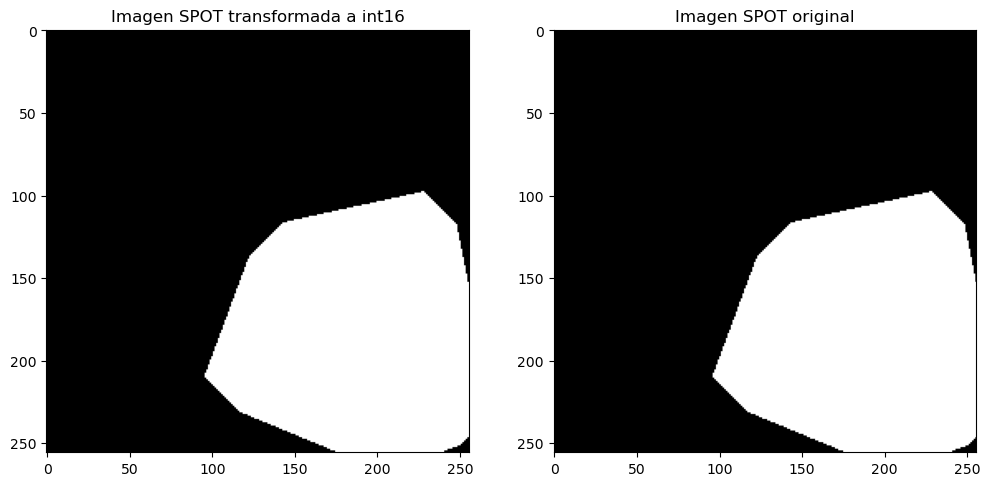

In [ ]:
spot = cv2.imread('images/SPOT.png', cv2.IMREAD_GRAYSCALE)
#Conversion imagen a int16
spot16 = spot.astype(np.int16)
#Visualizar 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(spot16, cmap='gray')
ax[0].set_title('Imagen SPOT transformada a int16')
ax[1].imshow(spot, cmap='gray')
ax[1].set_title('Imagen SPOT original')
plt.show()


##

## **Filtro Laplaciano**